In [1]:
 # source of this code: https://www.youtube.com/watch?v=W8AeOXa_FqUimport numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [2]:
# create dataset

n = 500 # number of examples in the data set
p = 2 # number of features of the examples

X, Y = make_circles(n_samples=n, factor=0.5, noise = 0.05)

Y = Y[:, np.newaxis]
Y.shape

(500, 1)

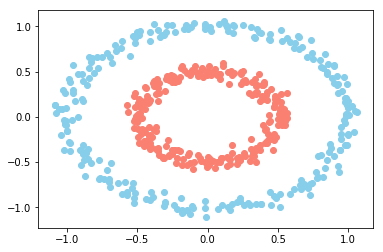

In [3]:
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c="skyblue")
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c="salmon")

In [4]:
# creating layer

class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1
        

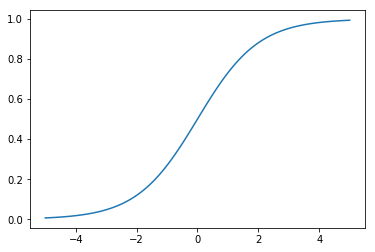

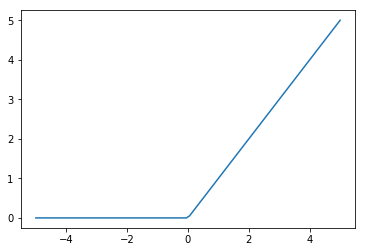

In [5]:
# activation function

sigm = (lambda x: 1 / (1 + np.e**(-x)), # sigmoid function
       lambda x: x * (1-x)) # derivate of sigmoid function

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))
plt.show()

plt.plot(_x, relu(_x))
plt.show()

In [6]:
# creating NN

l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)

def create_nn(topology, act_f):
    nn = []

    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    return nn

In [11]:
topology = [p, 4, 8, 16, 8, 4 , 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)**2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    
    out = [(None, X)]  # [(z, a)]
    
    
    # forward propagation
    
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        
        out.append((z, a))
    
    if train:
    
    # back propagation
        deltas = []
    
        for l in reversed(range(0, len(neural_net))):
            
            z = out[l+1][0]
            a = out[l+1][1]

            if l == len(neural_net) -1:
                # calculating last layer delta
                
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) # derivate of the last layer
                #print(deltas.shape, 444)
                
            else:
                # calculate previous layer delta
                
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
        
            _W = neural_net[l].W
    
            # gradient descent

            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
            
            
    return out[-1][1]
    
train(neural_net, X, Y, l2_cost, 0.5)

array([[0.37843726],
       [0.37824588],
       [0.37816178],
       [0.37880011],
       [0.37879199],
       [0.37875322],
       [0.37855641],
       [0.37835854],
       [0.37843193],
       [0.37855926],
       [0.37868304],
       [0.37849092],
       [0.3786196 ],
       [0.37865842],
       [0.37812028],
       [0.37856248],
       [0.37885729],
       [0.37822806],
       [0.37823096],
       [0.37836398],
       [0.37844904],
       [0.37843869],
       [0.37859706],
       [0.37857278],
       [0.37872983],
       [0.37821514],
       [0.37858447],
       [0.37810913],
       [0.37823188],
       [0.37830624],
       [0.37870473],
       [0.37881282],
       [0.37846735],
       [0.37826978],
       [0.37853251],
       [0.3783069 ],
       [0.37811616],
       [0.37825513],
       [0.37835994],
       [0.37858088],
       [0.37886845],
       [0.37832249],
       [0.37839822],
       [0.37819426],
       [0.37839016],
       [0.37851964],
       [0.37817257],
       [0.378

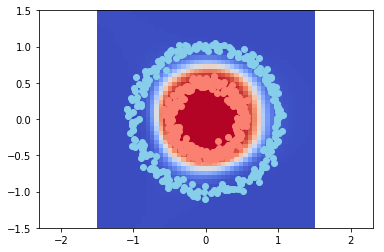

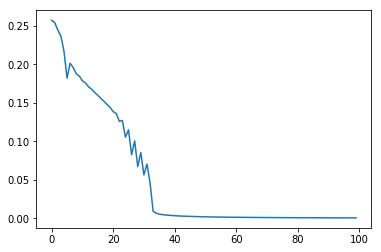

In [20]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

topology = [p, 4, 8, 1]

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  